<a href="https://colab.research.google.com/github/kacper-dobrow/tensorflow-course/blob/main/01_neural_net_regression_in_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to regression with neural nets in TF

In short predicting a value with input data

In [44]:
# Import TF
import tensorflow as tf
tf.__version__

'2.13.0'

## Creating data to view and fit

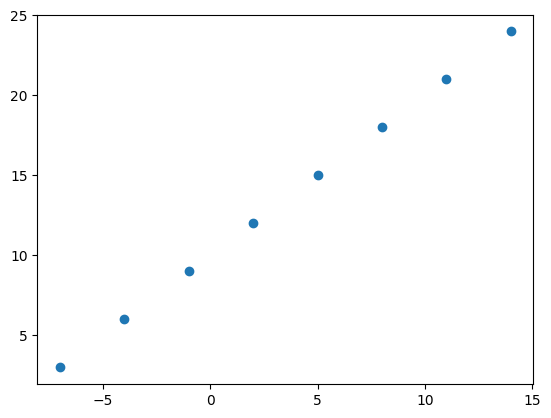

In [45]:
import numpy as np
import matplotlib.pyplot as plt

#create features (input)
X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

#create labels (output)
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

#visualize data with matplotlib
plt.scatter(X,y)

In [46]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [47]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700.]) #in for of a list - remember
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([939700.], dtype=float32)>)

In [48]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [49]:
# turn our np arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [50]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling in Tensorflow

1. Create a model - define input, output and hidden layers
2. Compile the model - define the loss fcn that tells you how far away from 'real values' you are, and the optimizer and evaluation metrics
3. Fit the model - letting the model find patterns between inputs and outputs (features and labels)

Reminder for the steps in modelling with tf
1. Get data ready
2. Build or pick a pretrained model
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload the trained model

> Blok z wcięciem



In [51]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE, #MAE is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics = ['mae']) #means that we use the tf.keras.losses.MAE   'mae' is sort of an alias

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) # fit inputs X to outputs y and you have 5 opportunities to do it right
#tf.expand_dims(X,axis=-1) istead of just X, because model.fit needs a higher dimensional input tensor


Epoch 1/5
1/1 [==============================] - 0s 343ms/step - loss: 10.6239 - mae: 10.6239
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 10.4914 - mae: 10.4914
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 10.3589 - mae: 10.3589
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 10.2264 - mae: 10.2264
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.0939 - mae: 10.0939


In [52]:
# Try to make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 65ms/step


array([[16.994566]], dtype=float32)

## Improving the model

We improve the model by altering the steps we took in order to create the model
1. Creating the model - add more layers, add more hidden neurons, change the activation fcn
2. Compiling the model - change the optimizer, **learning rate**
3. Fitting the model - fit it for more epochs or more data

In [53]:
# let's rebuild our model

#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = 'mae')

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 12.7459 - mae: 12.7459
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6134 - mae: 12.6134
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4809 - mae: 12.4809
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3484 - mae: 12.3484
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2159 - mae: 12.2159
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.0834 - mae: 12.0834
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9509 - mae: 11.9509
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8184 - mae: 11.8184
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11.6859 - mae: 11.6859
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 11.5534 - mae: 11.5534
Epoch 11/100
1/1 [==============================] 

In [54]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [55]:
#Model prediction
model.predict([17.])

1/1 [==============================] - 0s 89ms/step


array([[29.507925]], dtype=float32)

In [56]:
#once again try to improve the net

# 1. create the model
#add an extra layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), #only adding one hidden layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), #learning rate is probably the most important hyperparameter OF THEM ALL
              loss = 'mae', #keyword instead of explicit function
              metrics = ['mae'])

# 3. fit the model to the data
model.fit(tf.expand_dims(X,axis = -1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 589ms/step - loss: 13.9756 - mae: 13.9756
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.9136 - mae: 13.9136
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8515 - mae: 13.8515
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7894 - mae: 13.7894
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 13.7274 - mae: 13.7274
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.6653 - mae: 13.6653
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6031 - mae: 13.6031
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5410 - mae: 13.5410
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4788 - mae: 13.4788
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4166 - mae: 13.4166
Epoch 11/100
1/1 [==============================

In [57]:
model.predict([17.])

1/1 [==============================] - 0s 118ms/step


array([[28.333696]], dtype=float32)

To sum up - methods to improve the net:
* add layers
* increase no of hidden neurons
* change activation fcns
* change optimizers
* change the **learning rate**
* fit on more data
* fit for longer - more epochs

## Evaluating a model

In practice a typical workflow is:
1. Build a model
2. fit the model
3. Evaluate the model
4. Tweak the model
5. Repeat steps 2-4 until meets criteria

When evaluating **visualize**
* data
* the model
* training parameters
* predictions of the model

In [58]:
# make a bigger dataset
X = tf.range(-100.,100.,4.,dtype = tf.float32)
y= X+10.
X = tf.expand_dims(X,axis=-1)

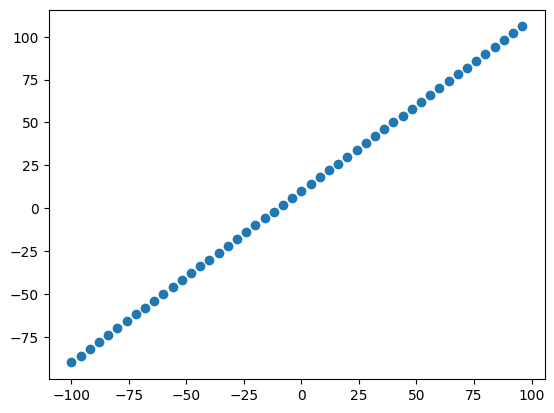

In [59]:
plt.scatter(X,y) #dots if I wanted to have a line I would pass plt.plot(X,y)

### 3 sets - training, validating, test set

* training set - typically 70-80% - the model learns from this data
* validation set - the model gets tuned on this data, typ 10-15%
* test set - the model gets evaluated upon the performance on this data, typ 10-15%

for now we'll split it only to two sets - training and test

In [60]:
# check the length of how many samples we have
len(X)

50

In [61]:
# split the data into train and test sets
X_train = X[:40] # first 80% of data
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

### Visualizing the data

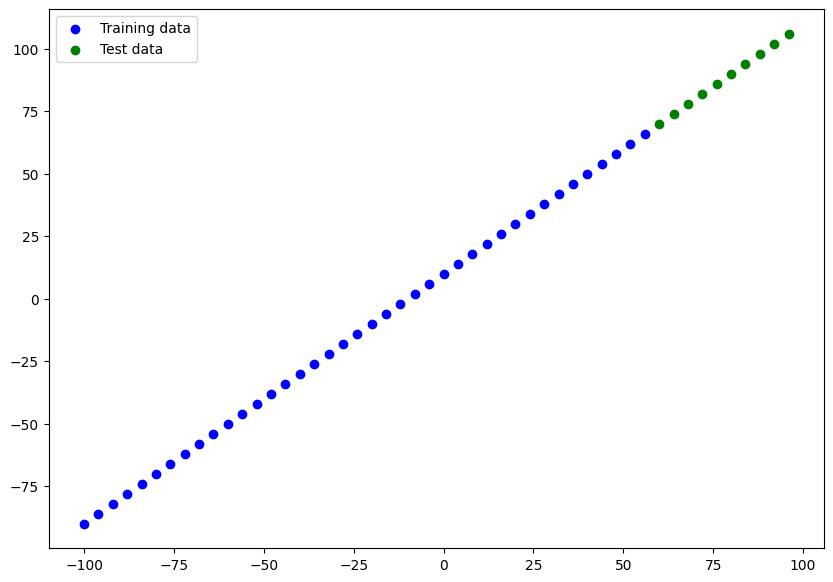

In [62]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c='b',label = 'Training data')
# Plot test data in blue
plt.scatter(X_test,y_test,c='g',label = 'Test data')
plt.legend()

In [63]:
#neural net for our data
# 1. create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = 'mae',
              metrics='mae')
# 3. fit
#model.fit(X_train,y_train,epochs=100)

### Visualizing the model

In [64]:
# Let's create a model thet builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (1,)), #dense means that the layer is fully connected
    tf.keras.layers.Dense(1)
    ])

# 2. compile
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = 'mae') # alternatively a list of metrics
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* total parameters - all parameters present in the model wich the model is going to learn
* trainable parameters - the parameters the model can update as it trains (we can exclude some of them from training if we don't want them to change)
* non-trainable parameters - these excluded

<< MIT's introduction to deep learning video >>

In [65]:
# Fit to data

model.fit(X_train,y_train, epochs=100, verbose = 0)

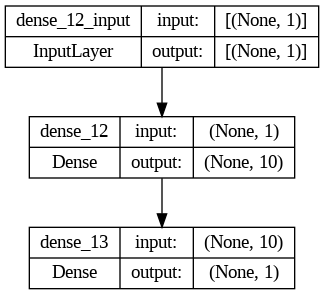

In [66]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualize our model's predictions

To visualize predictions, plot them against the true values

In [67]:
# make predictions
y_pred = tf.constant(model.predict(X_test))
X_test.shape, y_pred.shape

1/1 [==============================] - 0s 53ms/step


(TensorShape([10, 1]), TensorShape([10, 1]))

In [68]:
#create a plotting fcn in case I want to use it in the future
def plot_predictions(train_features = X_train,
                     train_labels = y_train,
                     test_features = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  '''
  plots training and test data against the predictions of the model
  '''
  plt.figure(figsize = (10,7))
  # plot training data in blue
  plt.scatter(train_features,train_labels,c='b',label='Training data')
  #plot test data in green
  plt.scatter(test_features,test_labels,c='g',label = 'Test data')
  #plot predictions in red
  plt.scatter(test_features,predictions,c='r',label= 'Predictions')
  #show the legend
  plt.legend()


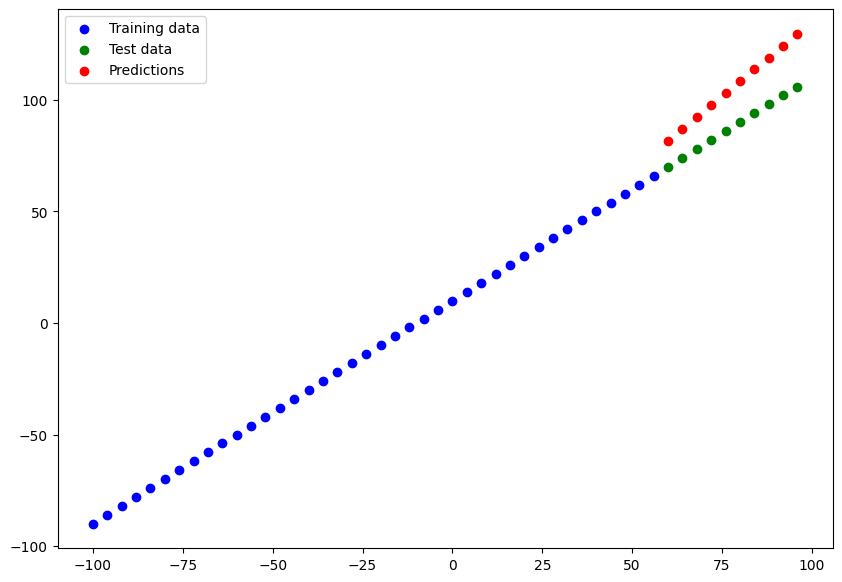

In [69]:
plot_predictions()

### Evaluation metrics

### Download a model from Google Colab

1. Files - right click on the file and download
2. Use code (below)

In [70]:
# download
from google.colab import files
#files.download('/content/sample_data/README.md')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
# save a file from google colab to google drive
!cp /content/sample_data/README.md /content/drive/MyDrive

cp: cannot create regular file '/content/drive/MyDrive': No such file or directory


### A larger example

On medical cost datasets from Kaggle

In [72]:
X_train, y_train

(<tf.Tensor: shape=(40, 1), dtype=float32, numpy=
 array([[-100.],
        [ -96.],
        [ -92.],
        [ -88.],
        [ -84.],
        [ -80.],
        [ -76.],
        [ -72.],
        [ -68.],
        [ -64.],
        [ -60.],
        [ -56.],
        [ -52.],
        [ -48.],
        [ -44.],
        [ -40.],
        [ -36.],
        [ -32.],
        [ -28.],
        [ -24.],
        [ -20.],
        [ -16.],
        [ -12.],
        [  -8.],
        [  -4.],
        [   0.],
        [   4.],
        [   8.],
        [  12.],
        [  16.],
        [  20.],
        [  24.],
        [  28.],
        [  32.],
        [  36.],
        [  40.],
        [  44.],
        [  48.],
        [  52.],
        [  56.]], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26., 

In [73]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [75]:
insurance_one_hot = pd.get_dummies(insurance).astype('float64')
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [78]:
#create features and labels (inputs and outputs)
X = insurance_one_hot.drop(columns = 'charges')
y = insurance_one_hot['charges']
X.head(), y.head()

(    age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0  19.0  27.900       0.0         1.0       0.0        0.0         1.0   
 1  18.0  33.770       1.0         0.0       1.0        1.0         0.0   
 2  28.0  33.000       3.0         0.0       1.0        1.0         0.0   
 3  33.0  22.705       0.0         0.0       1.0        1.0         0.0   
 4  32.0  28.880       0.0         0.0       1.0        1.0         0.0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0               0.0               0.0               0.0               1.0  
 1               0.0               0.0               1.0               0.0  
 2               0.0               0.0               1.0               0.0  
 3               0.0               1.0               0.0               0.0  
 4               0.0               1.0               0.0               0.0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.8

In [79]:
# Create training and test sets

# first import the appropriate tools
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

In [88]:
# set seed for reproducibility

tf.random.set_seed(42)

# build a neural net

nn = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1),
])

# compile the neural net

nn.compile(loss='mse',metrics = 'mae', optimizer = tf.keras.optimizers.SGD(clipnorm=100))

# fit the net

nn.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 180988288.0000 - mae: 9507.6934
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 132275720.0000 - mae: 8999.6064
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 129157112.0000 - mae: 8937.4746
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 131597112.0000 - mae: 9173.5879
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 130228256.0000 - mae: 9048.1553
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 129979496.0000 - mae: 9117.9756
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 128880752.0000 - mae: 8825.4277
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 127757736.0000 - mae: 9029.3584
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 128782560.0000 - mae: 9001.3750
Epoch 10/100
34/34 [==============================] - 0

In [89]:
# check the results on test data

nn.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 53980844.0000 - mae: 5055.4546


[53980844.0, 5055.45458984375]

Let's try to improve the model

experiments:
* add an extra layer
* train for longer

In [102]:
# seed
tf.random.set_seed(42)
# create the net
nn_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(121),
    tf.keras.layers.Dense(1)
])

# compile the net
nn_2.compile(loss = 'mse', metrics = 'mae', optimizer = tf.keras.optimizers.Adam(clipnorm=100))

# fit the net
history = nn_2.fit(X_train,y_train,epochs = 200,verbose = 0)

Epoch 1/200
34/34 [==============================] - 2s 2ms/step - loss: 321407104.0000 - mae: 13310.1035
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 318163200.0000 - mae: 13197.4678
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 312490784.0000 - mae: 12996.7773
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 303502688.0000 - mae: 12669.9268
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 290776576.0000 - mae: 12188.0752
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 273662496.0000 - mae: 11517.4688
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 252742800.0000 - mae: 10664.0742
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 228693504.0000 - mae: 9679.1895
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 202195104.0000 - mae: 8622.4121
Epoch 10/200
34/34 [============================

In [103]:
# evaluate the larger model
nn_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 34334364.0000 - mae: 4325.9355


[34334364.0, 4325.935546875]

Text(0.5, 0, 'epochs')

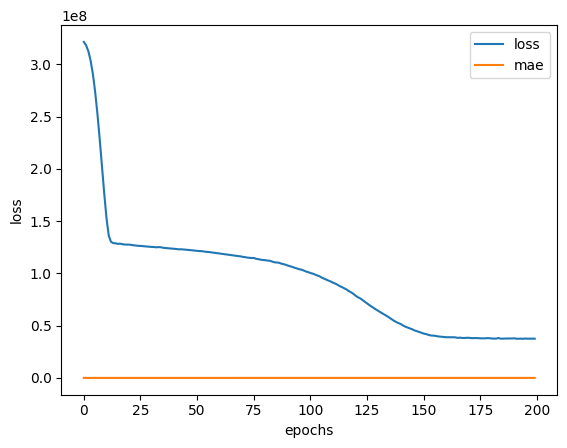

In [104]:
# plot history of learning
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Introducing an early stopping callback in order to stop fitting after reaching certain performance.

### Preprocessing Data: normalization and standarization

Normalization also referred to as feature scaling - getting all the features into a common scale e.g. between 0 and 1
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [107]:
# start fresh
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# read the insurance df
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [111]:
# to prepare our data, we borrow few classes
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

# create scaled X and y
X = df.drop(columns = 'charges')
y = df['charges']

# build train and tes sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)